In [119]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy import stats
%matplotlib inline

# read data
redata = open('./manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=';')
next(csvReader)

all_data = np.array([r for r in csvReader])
all_data = all_data.astype(np.float)

# remove outliers (if GrossSqFt > 30000)
index = np.where(all_data[:,3] <= 35000)


In [46]:
# the dependent variable is MarketValueperSqFt
# the rest will be used to predict it
concat = [0, 1, 2, 3, 4]
t = []
for i in concat:
    t.append(X[index,i])
    
x=np.array(t)
x=x.reshape((-1, len(concat)))
x_max = np.amax(x, axis=0)
for i in range(0, len(concat)):
    x[:,i] = x[:,i] / x_max[i]
print(x.shape)

y=np.array(all_data[index,5]).reshape(-1,1)
y_max = np.amax(y)
y = y/y_max
print(y.shape)

(5, 1, 1089)
(1089, 5)
(1089, 1)


[[ 0.01304624 -0.04555115  0.0383579   0.02019259 -0.05408292]] [ 0.40465819]
MSE Linear: %.2f 0.0362181919574


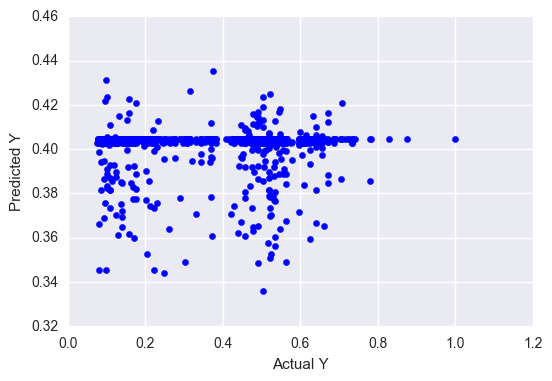

In [72]:
# basic linear regression
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x, y)
print(lin_regr.coef_, lin_regr.intercept_)
print("MSE Linear: %.2f", np.mean((lin_regr.predict(x) - y) ** 2))

plt.scatter(y, lin_regr.predict(x), color='blue')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

[[-0.00275747 -0.0080715   0.0002739  -0.0012416  -0.00910595]] [ 0.40367945]
MSE Ridge: %.2f 0.0362780923571


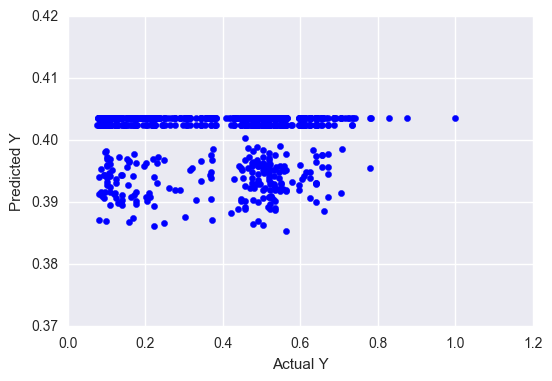

In [73]:
# ridge regression
ridge_regr = linear_model.Ridge(alpha=1.0e2)
ridge_regr.fit(x, y)
print(ridge_regr.coef_, ridge_regr.intercept_)
print("MSE Ridge: %.2f", np.mean((ridge_regr.predict(x) - y) ** 2))

plt.scatter(y, ridge_regr.predict(x), color='blue')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

[-0. -0. -0. -0. -0.] [ 0.40140098]
MSE Lasso (black): %.2f 0.0363247576711


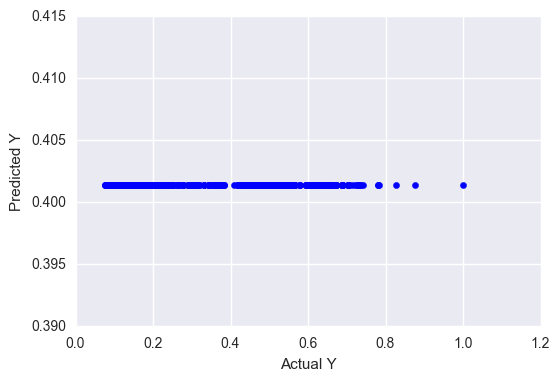

In [76]:
# lasso regression
lasso_regr = linear_model.Lasso(alpha=1.0e2)
lasso_regr.fit(x, y)
print(lasso_regr.coef_, lasso_regr.intercept_)
print("MSE Lasso (black): %.2f", np.mean((lasso_regr.predict(x) - y) ** 2))

plt.scatter(y, lasso_regr.predict(x), color='blue')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

[ 0.18995343  0.01152987  0.01128068  0.00971195  0.00915756]
[ 0.82006034  0.04977633  0.04870054  0.04192808  0.03953471]


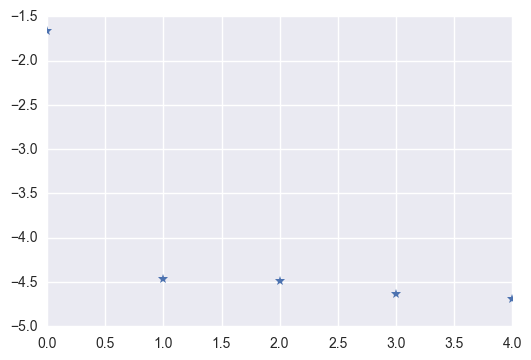

In [111]:
# principal component analysis on raw data
pca=PCA(n_components=3)
# fit the model with x and apply the dimensionality reduction on x
x_proj = pca.fit_transform(x)
print(tpca.explained_variance_)
print(tpca.explained_variance_ratio_)

plt.figure(1)
plt.plot(np.log(tpca.explained_variance_), '*')
plt.show()

[[-0.01406944  0.01838721  0.05043957]] [ 0.40140098]
MSE Linear: %.2f 0.0362545586914


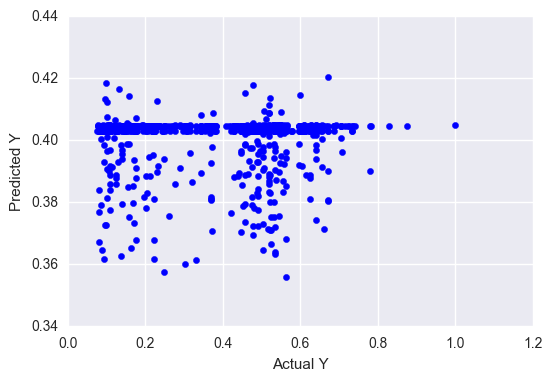

In [114]:
# linear regression on pca-featured data
lin_regr_pca = linear_model.LinearRegression()
lin_regr_pca.fit(x_proj, y)
print(lin_regr_pca.coef_, lin_regr_pca.intercept_)
print("MSE Linear: %.2f", np.mean((lin_regr_pca.predict(x_proj) - y) ** 2))

plt.scatter(y, lin_regr_pca.predict(x_proj), color='blue')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

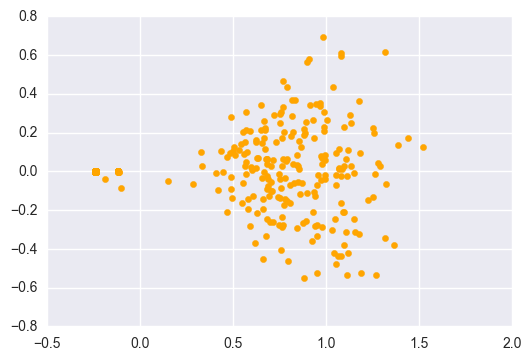

In [117]:
# just for curiosity, here are the first two principal components
plt.scatter(x_proj[:,0], x_proj[:,1], color='orange')

In [122]:
# cross-validation: evaluating estimator performance

# let's first split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(653, 5) (653, 1)
(436, 5) (436, 1)


In [125]:
# basic linear regression - we've seen this before
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)
# oops, gotta fix this
print(lin_regr.score(X_test, y_test))
print(lin_regr.coef_, lin_regr.intercept_)
#print("MSE Linear: %.2f", np.mean((lin_regr.predict() - y) ** 2))

#plt.scatter(y, lin_regr.predict(x), color='blue')
#plt.xlabel('Actual Y')
#plt.ylabel('Predicted Y')

-0.00158418832836
[[-0.00559946 -0.07323575  0.04391032  0.0055318  -0.00587372]] [ 0.40430934]
